In [1]:
# Generated in 4_Train_Score_split
run = "train_df" 
score = "score_df"

In [2]:
import pandas as pd
import seaborn as sns
from igel import Igel

# Algorithm selection


In [3]:
#Fit
algo_fit = 'yaml/forest.yaml'

# Evaluate
algo_eval = 'yaml/hyper.yaml'

# Predict
algo_predict = 'yaml/hyper.yaml'   # hyper, forest

# Options [cluster, hyper, iris, regres, forest]

- [cluster,cluster,cluster] working
- [cluster,hyper,hyper] working
- `['forest'->`hyper`->`hyper`]

In [4]:
# Import
df = pd.read_csv(run + ".csv")

# Timestamp will need to be reconfigured as index on each load
#df = df.set_index('timestamp')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
   
#df = df.replace(r'\D+', '', regex=True)
df

,tweet_id,priority,postCategories_x,positive_sentiment,negative_sentiment,numb_of_questions,tweet_length,userFollowersCount,userFriendsCount,user_list_count,dict_precision,dict_recall,dict_f_measure
0,2.115660e+17,0.75,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.116544e+17,0.50,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.116813e+17,0.25,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.116856e+17,0.25,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.118770e+17,0.25,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,3.963360e+17,0.25,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
939,3.963361e+17,0.25,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,3.963362e+17,0.25,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,3.963363e+17,0.25,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Fit

In [18]:


# provide the arguments in a dictionary
params = {
        'cmd': 'fit',    # provide the command you want to use. whether fit, evaluate or predict
        'data_path': run + ".csv",
        'yaml_path': algo_fit
}

Igel(**params)


INFO - Entered CLI args: {'cmd': 'fit', 'data_path': 'train_df.csv', 'yaml_path': 'yaml/forest.yaml'}
INFO - Executing command: fit ...
INFO - reading data from train_df.csv
INFO - You passed the configurations as a yaml file.
INFO - your chosen configuration: {'dataset': {'type': 'csv', 'random_numbers': {'generate_reproducible': True, 'seed': 42}, 'split': {'test_size': 0.2, 'shuffle': True}, 'preprocess': {'missing_values': 'mean', 'encoding': {'type': 'oneHotEncoding'}, 'scale': {'method': 'standard', 'target': 'inputs'}}}, 'model': {'type': 'classification', 'algorithm': 'RandomForest', 'arguments': {'n_estimators': 100, 'max_depth': 30}}, 'target': ['postCategories_x']}
INFO - dataset_props: {'type': 'csv', 'random_numbers': {'generate_reproducible': True, 'seed': 42}, 'split': {'test_size': 0.2, 'shuffle': True}, 'preprocess': {'missing_values': 'mean', 'encoding': {'type': 'oneHotEncoding'}, 'scale': {'method': 'standard', 'target': 'inputs'}}} 
model_props: {'type': 'classific

TypeError: cannot unpack non-iterable NoneType object

In [6]:
from igel import Igel

# provide the arguments in a dictionary
params = {
        'cmd': 'evaluate',    # provide the command you want to use. whether fit, evaluate or predict
        'data_path': run + ".csv",
        'yaml_path': algo_eval
}

Igel(**params)

INFO - Entered CLI args: {'cmd': 'evaluate', 'data_path': 'train_df.csv', 'yaml_path': 'yaml/hyper.yaml'}
INFO - Executing command: evaluate ...
INFO - reading data from train_df.csv
INFO - path of the pre-fitted model => /Users/pseudo/Documents/GitHub/HelpMe/src/python/notebooks/model_results/model.sav
INFO - result path: /Users/pseudo/Documents/GitHub/HelpMe/src/python/notebooks/model_results 
INFO - loading model form /Users/pseudo/Documents/GitHub/HelpMe/src/python/notebooks/model_results/model.sav 
INFO - dataset shape: (943, 15)
INFO - dataset attributes: ['Unnamed: 0', 'Unnamed: 0.1', 'tweet_id', 'priority', 'postCategories_x', 'positive_sentiment', 'negative_sentiment', 'numb_of_questions', 'tweet_length', 'userFollowersCount', 'userFriendsCount', 'user_list_count', 'dict_precision', 'dict_recall', 'dict_f_measure']
INFO - Check for missing values in the dataset ...  
Unnamed: 0            0
Unnamed: 0.1          0
tweet_id              0
priority              0
postCategories_

In [17]:
from igel import Igel

# provide the arguments in a dictionary
params = {
        'cmd': 'predict',    # provide the command you want to use. whether fit, evaluate or predict
        'data_path': score + ".csv",
        'yaml_path': algo_predict
}

Igel(**params)



INFO - Entered CLI args: {'cmd': 'predict', 'data_path': 'score_df.csv', 'yaml_path': 'yaml/hyper.yaml'}
INFO - Executing command: predict ...
INFO - reading data from score_df.csv
INFO - path of the pre-fitted model => /Users/pseudo/Documents/GitHub/HelpMe/src/python/notebooks/model_results/model.sav
INFO - loading from /Users/pseudo/Documents/GitHub/HelpMe/src/python/notebooks/model_results/model.sav
INFO - dataset shape: (2949, 15)
INFO - dataset attributes: ['Unnamed: 0', 'Unnamed: 0.1', 'tweet_id', 'priority', 'postCategories_x', 'positive_sentiment', 'negative_sentiment', 'numb_of_questions', 'tweet_length', 'userFollowersCount', 'userFriendsCount', 'user_list_count', 'dict_precision', 'dict_recall', 'dict_f_measure']
INFO - Check for missing values in the dataset ...  
Unnamed: 0            0
Unnamed: 0.1          0
tweet_id              0
priority              0
postCategories_x      0
positive_sentiment    0
negative_sentiment    0
numb_of_questions     0
tweet_length         

In [8]:
# Predictions

In [9]:
res = pd.read_csv("model_results/predictions.csv")
#res.reset_index()
res



,result
0,5
1,5
2,5
3,5
4,5
...,...
2944,5
2945,5
2946,5
2947,5


In [10]:
second_source = pd.read_csv("score_df.csv")
second_source = df.loc[:, ~df.columns.str.contains('^Unnamed')]

second_source

,tweet_id,priority,postCategories_x,positive_sentiment,negative_sentiment,numb_of_questions,tweet_length,userFollowersCount,userFriendsCount,user_list_count,dict_precision,dict_recall,dict_f_measure
0,2.115660e+17,0.75,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.116544e+17,0.50,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.116813e+17,0.25,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.116856e+17,0.25,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.118770e+17,0.25,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,3.963360e+17,0.25,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
939,3.963361e+17,0.25,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,3.963362e+17,0.25,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,3.963363e+17,0.25,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
mergedDf = second_source.merge(res, left_index=True, right_index=True)
mergedDf

,tweet_id,priority,postCategories_x,positive_sentiment,negative_sentiment,numb_of_questions,tweet_length,userFollowersCount,userFriendsCount,user_list_count,dict_precision,dict_recall,dict_f_measure,result
0,2.115660e+17,0.75,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2.116544e+17,0.50,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2.116813e+17,0.25,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
3,2.116856e+17,0.25,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
4,2.118770e+17,0.25,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,3.963360e+17,0.25,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
939,3.963361e+17,0.25,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
940,3.963362e+17,0.25,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
941,3.963363e+17,0.25,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [12]:
mergedDf.to_csv("results_merged.csv", index=False)
df = pd.read_csv("results_merged.csv")
df

,tweet_id,priority,postCategories_x,positive_sentiment,negative_sentiment,numb_of_questions,tweet_length,userFollowersCount,userFriendsCount,user_list_count,dict_precision,dict_recall,dict_f_measure,result
0,2.115660e+17,0.75,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2.116544e+17,0.50,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2.116813e+17,0.25,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
3,2.116856e+17,0.25,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
4,2.118770e+17,0.25,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,3.963360e+17,0.25,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
939,3.963361e+17,0.25,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
940,3.963362e+17,0.25,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
941,3.963363e+17,0.25,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [13]:
#df = df.sort_values(by=['result'])
df

,tweet_id,priority,postCategories_x,positive_sentiment,negative_sentiment,numb_of_questions,tweet_length,userFollowersCount,userFriendsCount,user_list_count,dict_precision,dict_recall,dict_f_measure,result
0,2.115660e+17,0.75,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2.116544e+17,0.50,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2.116813e+17,0.25,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
3,2.116856e+17,0.25,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
4,2.118770e+17,0.25,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,3.963360e+17,0.25,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
939,3.963361e+17,0.25,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
940,3.963362e+17,0.25,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
941,3.963363e+17,0.25,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


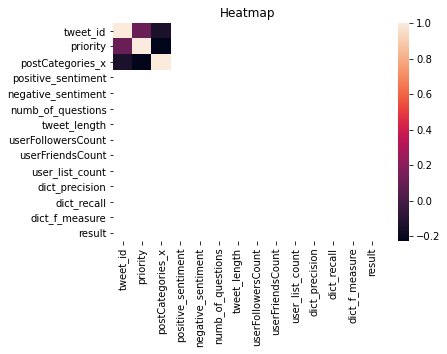

In [14]:
import matplotlib.pyplot as plt


sns.heatmap(df.corr())
plt.title('Heatmap')
plt.savefig('heatmap.png')

In [15]:
df.loc[df['result'] == 5]



INFO - NumExpr defaulting to 4 threads.


,tweet_id,priority,postCategories_x,positive_sentiment,negative_sentiment,numb_of_questions,tweet_length,userFollowersCount,userFriendsCount,user_list_count,dict_precision,dict_recall,dict_f_measure,result
0,2.115660e+17,0.75,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2.116544e+17,0.50,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2.116813e+17,0.25,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
3,2.116856e+17,0.25,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
4,2.118770e+17,0.25,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,3.963360e+17,0.25,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
939,3.963361e+17,0.25,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
940,3.963362e+17,0.25,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
941,3.963363e+17,0.25,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [16]:
df.describe()

,tweet_id,priority,postCategories_x,positive_sentiment,negative_sentiment,numb_of_questions,tweet_length,userFollowersCount,userFriendsCount,user_list_count,dict_precision,dict_recall,dict_f_measure,result
count,9.430000e+02,943.000000,943.000000,943.0,943.0,943.0,943.0,943.0,943.0,943.0,943.0,943.0,943.0,943.0
mean,3.029627e+17,0.387328,12.764581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
std,6.694446e+16,0.188837,5.135710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,2.115660e+17,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
25%,2.433901e+17,0.250000,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
50%,2.758353e+17,0.250000,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
75%,3.782131e+17,0.500000,17.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
max,3.963364e+17,1.000000,23.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
